Dataset Link: https://drive.google.com/file/d/1HeMrD3Sx4q-W2VJL2hQd9Ezyq3-dkY9g/view?usp=sharing
<br>Orignal Dataset Link: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/Shareddrives/Projects/sc/bt.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os
print(os.listdir('bt'))
print(os.listdir('bt/train'))

['test', 'train']
['no', 'yes']


In [ ]:
main_dir = '/content/bt'
test = '/content/bt/test'
train = '/content/bt/train'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
labels = ['NO', 'YES']

In [ ]:
def plot_samples(x, n=20):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    d = os.listdir(x)
    imgs = []
    j = 10
    n = (n//j)*j
    i = n//j

    for i in range(n):
      rand = np.random.randint(0,len(d))
      img = d[rand]
      imgs.append(x+'/'+img)

    plt.figure(figsize=(3*j,3*i))
    c = 1
    for img in imgs:
        plt.subplot(i,j,c)
        im = Image.open(img)
        plt.imshow(im, cmap='gray')

        plt.xticks([])
        plt.yticks([])
        c += 1
    plt.show()

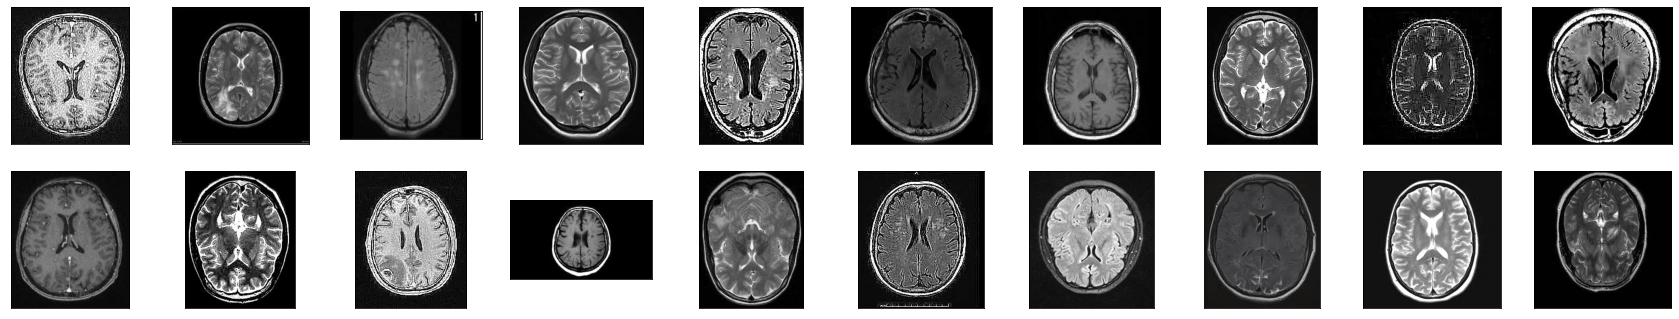

In [ ]:
plot_samples(train + '/no')

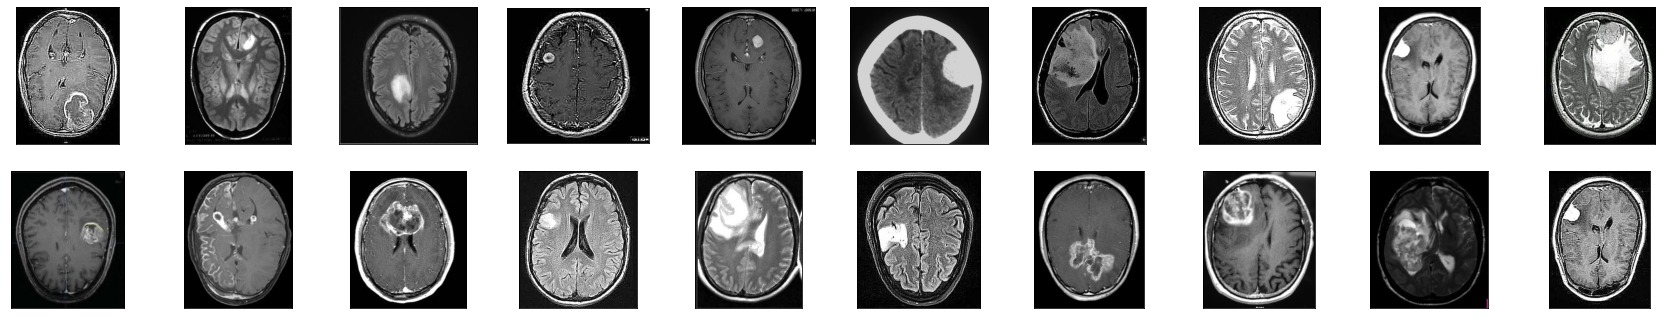

In [ ]:
plot_samples(train + '/yes')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten, Dropout, BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
IMG_SIZE = (224,224)
RANDOM_SEED = 324

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    shuffle=True,
    class_mode='binary',
    subset='training',
    seed=RANDOM_SEED
)

val_data = train_datagen.flow_from_directory(
    train,  
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=8, 
    shuffle=True,
    class_mode='binary',
    subset = 'validation',
    seed=RANDOM_SEED
)

test_data = test_datagen.flow_from_directory(
    test,  
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=8, 
    shuffle=False,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 2240 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from keras.models import Model 
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception

In [ ]:
in_shape = (224,224,3)

In [ ]:
vgg = VGG16(include_top=False, input_shape=in_shape)

v16 = Sequential()
v16.add(vgg)
v16.add(Dropout(0.5))
v16.add(Flatten())
v16.add(Dense(1024, activation='relu'))
v16.add(Dense(1, activation='sigmoid'))

v16.layers[0].trainable = False

v16.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

v16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
inceptionV3 = InceptionV3(include_top=False, input_shape=in_shape)

incept = Sequential()
incept.add(inceptionV3)
incept.add(Dropout(0.5))
incept.add(Flatten())
incept.add(Dense(1024, activation='relu'))
incept.add(Dense(1, activation='sigmoid'))

incept.layers[0].trainable = False

incept.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

incept.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
xception = Xception(include_top=False, input_shape=in_shape)

xcept = Sequential()
xcept.add(xception)
xcept.add(Dropout(0.5))
xcept.add(Flatten())
xcept.add(Dense(1024, activation='relu'))
xcept.add(Dense(1, activation='sigmoid'))

xcept.layers[0].trainable = False

xcept.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

xcept.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
v16_his = v16.fit(train_data, steps_per_epoch=12, epochs=10, validation_data=val_data, validation_steps=15)

Epoch 1/10
12/12 [==============================] - 17s 564ms/step - loss: 2.4009 - accuracy: 0.6146 - val_loss: 0.6974 - val_accuracy: 0.7750
Epoch 2/10
12/12 [==============================] - 7s 574ms/step - loss: 0.7924 - accuracy: 0.7396 - val_loss: 0.5726 - val_accuracy: 0.7750
Epoch 3/10
12/12 [==============================] - 5s 450ms/step - loss: 0.4415 - accuracy: 0.8333 - val_loss: 0.4265 - val_accuracy: 0.8167
Epoch 4/10
12/12 [==============================] - 5s 445ms/step - loss: 0.4096 - accuracy: 0.8333 - val_loss: 0.3453 - val_accuracy: 0.8750
Epoch 5/10
12/12 [==============================] - 5s 450ms/step - loss: 0.4268 - accuracy: 0.8646 - val_loss: 0.2674 - val_accuracy: 0.8500
Epoch 6/10
12/12 [==============================] - 5s 441ms/step - loss: 0.3781 - accuracy: 0.8438 - val_loss: 0.2206 - val_accuracy: 0.9250
Epoch 7/10
12/12 [==============================] - 5s 440ms/step - loss: 0.3235 - accuracy: 0.9010 - val_loss: 0.2210 - val_accuracy: 0.8750
Epoch

In [ ]:
incept_his = incept.fit(train_data, steps_per_epoch=12, epochs=10, validation_data=val_data, validation_steps=15)

Epoch 1/10
12/12 [==============================] - 6s 471ms/step - loss: 2.4756 - accuracy: 0.6198 - val_loss: 0.8835 - val_accuracy: 0.6667
Epoch 2/10
12/12 [==============================] - 5s 443ms/step - loss: 0.8443 - accuracy: 0.7031 - val_loss: 0.4099 - val_accuracy: 0.8083
Epoch 3/10
12/12 [==============================] - 5s 437ms/step - loss: 0.5128 - accuracy: 0.7917 - val_loss: 0.3994 - val_accuracy: 0.7833
Epoch 4/10
12/12 [==============================] - 5s 434ms/step - loss: 0.5867 - accuracy: 0.8229 - val_loss: 0.6055 - val_accuracy: 0.7583
Epoch 5/10
12/12 [==============================] - 5s 439ms/step - loss: 0.4745 - accuracy: 0.7760 - val_loss: 0.2983 - val_accuracy: 0.8750
Epoch 6/10
12/12 [==============================] - 5s 450ms/step - loss: 0.4305 - accuracy: 0.8281 - val_loss: 0.3037 - val_accuracy: 0.8583
Epoch 7/10
12/12 [==============================] - 5s 436ms/step - loss: 0.2557 - accuracy: 0.8906 - val_loss: 0.2521 - val_accuracy: 0.8917
Epoch 

In [ ]:
xcept_his = xcept.fit(train_data, steps_per_epoch=12, epochs=10, validation_data=val_data, validation_steps=15)

Epoch 1/10
12/12 [==============================] - 8s 596ms/step - loss: 2.2026 - accuracy: 0.6719 - val_loss: 1.0140 - val_accuracy: 0.6417
Epoch 2/10
12/12 [==============================] - 5s 440ms/step - loss: 0.6947 - accuracy: 0.7448 - val_loss: 0.9274 - val_accuracy: 0.6750
Epoch 3/10
12/12 [==============================] - 5s 446ms/step - loss: 0.5978 - accuracy: 0.7344 - val_loss: 0.3229 - val_accuracy: 0.8833
Epoch 4/10
12/12 [==============================] - 6s 481ms/step - loss: 0.3756 - accuracy: 0.8385 - val_loss: 0.4071 - val_accuracy: 0.7917
Epoch 5/10
12/12 [==============================] - 5s 438ms/step - loss: 0.3181 - accuracy: 0.8802 - val_loss: 0.2189 - val_accuracy: 0.8917
Epoch 6/10
12/12 [==============================] - 5s 439ms/step - loss: 0.4764 - accuracy: 0.8021 - val_loss: 0.3566 - val_accuracy: 0.8500
Epoch 7/10
12/12 [==============================] - 5s 429ms/step - loss: 0.2819 - accuracy: 0.9062 - val_loss: 0.3792 - val_accuracy: 0.8333
Epoch 

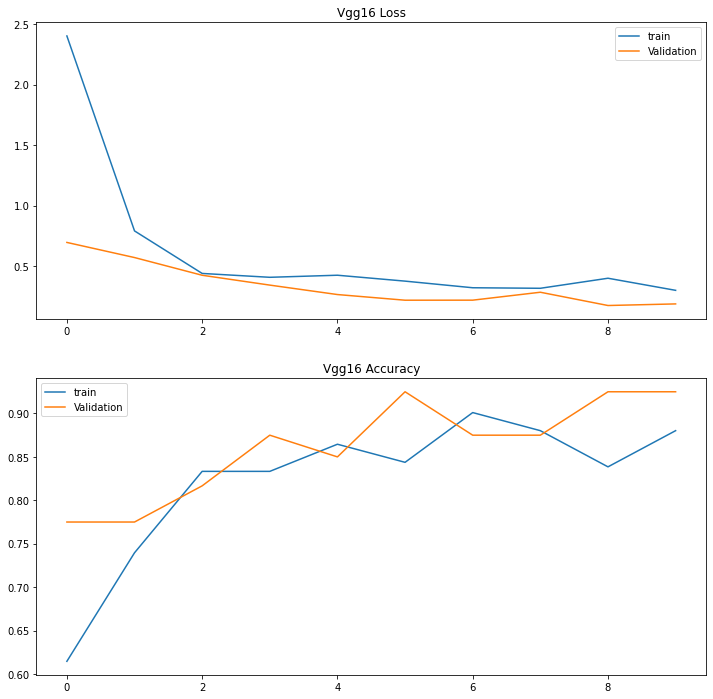

In [ ]:
plt.figure(figsize=(12,12))
# plot loss during training
plt.subplot(211)
plt.title('Vgg16 Loss')
plt.plot(v16_his.history['loss'], label='train')
plt.plot(v16_his.history['val_loss'], label='Validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Vgg16 Accuracy')
plt.plot(v16_his.history['accuracy'], label='train')
plt.plot(v16_his.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

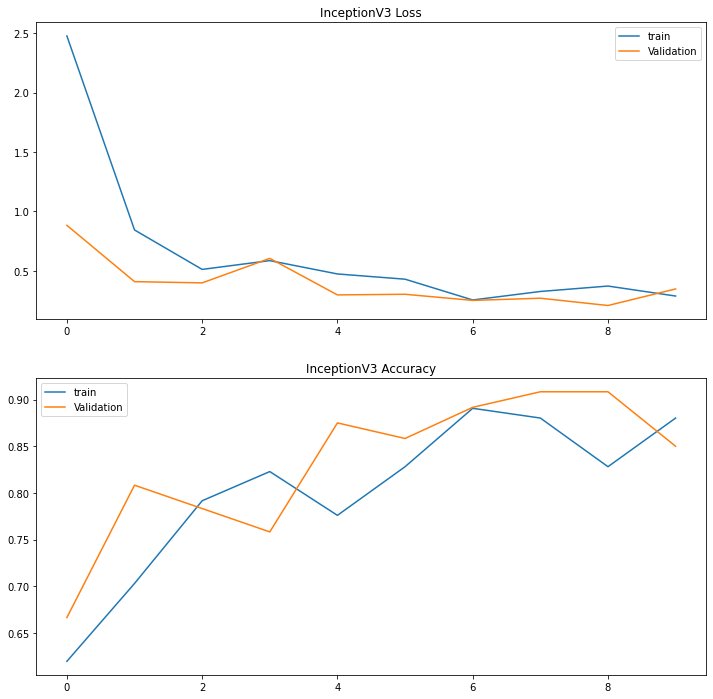

In [ ]:
plt.figure(figsize=(12,12))
# plot loss during training
plt.subplot(211)
plt.title('InceptionV3 Loss')
plt.plot(incept_his.history['loss'], label='train')
plt.plot(incept_his.history['val_loss'], label='Validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('InceptionV3 Accuracy')
plt.plot(incept_his.history['accuracy'], label='train')
plt.plot(incept_his.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

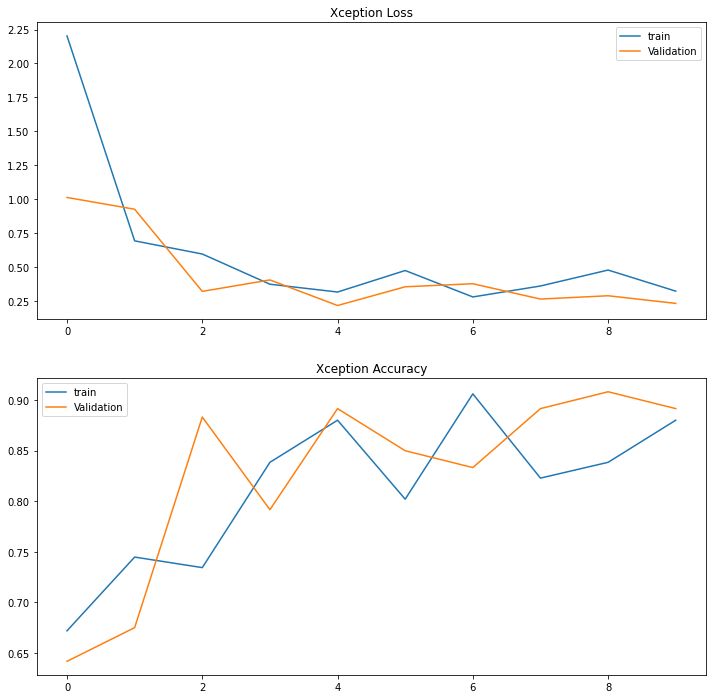

In [ ]:
plt.figure(figsize=(12,12))
# plot loss during training
plt.subplot(211)
plt.title('Xception Loss')
plt.plot(xcept_his.history['loss'], label='train')
plt.plot(xcept_his.history['val_loss'], label='Validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Xception Accuracy')
plt.plot(xcept_his.history['accuracy'], label='train')
plt.plot(xcept_his.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

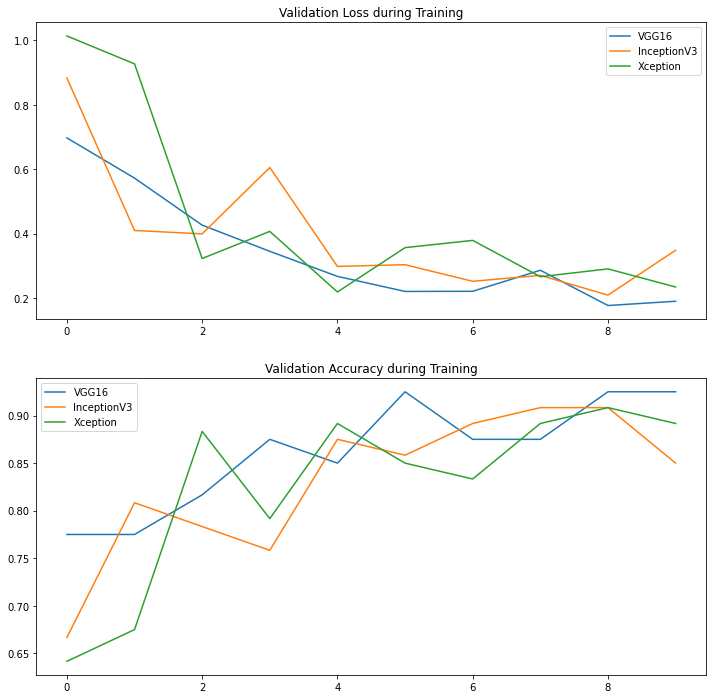

In [ ]:
plt.figure(figsize=(12,12))
# plot loss during training
plt.subplot(211)
plt.title('Validation Loss during Training')
plt.plot(v16_his.history['val_loss'], label='VGG16')
plt.plot(incept_his.history['val_loss'], label='InceptionV3')
plt.plot(xcept_his.history['val_loss'], label='Xception')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Validation Accuracy during Training')
plt.plot(v16_his.history['val_accuracy'], label='VGG16')
plt.plot(incept_his.history['val_accuracy'], label='InceptionV3')
plt.plot(xcept_his.history['val_accuracy'], label='Xception')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [ ]:
l1, a1 = v16.evaluate(test_data)
l2, a2 = incept.evaluate(test_data)
l3, a3 = xcept.evaluate(test_data)

25/25 [==============================] - 1s 54ms/step - loss: 0.2531 - accuracy: 0.9100


In [ ]:
print(f'VGG16 Loss: {l1:.4f} Accuracy: {a1:.4f}')
print(f'InceptionV3 Loss: {l2:.4f} Accuracy: {a2:.4f}')
print(f'Xception Loss: {l3:.4f} Accuracy: {a3:.4f}')

VGG16 Loss: 0.1938 Accuracy: 0.9150
InceptionV3 Loss: 0.4070 Accuracy: 0.8100
Xception Loss: 0.2531 Accuracy: 0.9100


In [ ]:
pred_vgg = v16.predict(test_data)
pred_vgg = [1 if x>=0.5 else 0 for x in pred_vgg]

pred_incept = incept.predict(test_data)
pred_incept = [1 if x>=0.5 else 0 for x in pred_incept]

pred_xcept = xcept.predict(test_data)
pred_xcept = [1 if x>=0.5 else 0 for x in pred_xcept]

25/25 [==============================] - 1s 56ms/step


In [ ]:
print('VGG16: \n', classification_report(test_data.classes, pred_vgg, target_names = ['No Tumor (Class 0)','Tumor (Class 1)']))
print('\nInceptionV3: \n', classification_report(test_data.classes, pred_incept, target_names = ['No Tumor (Class 0)','Tumor (Class 1)']))
print('\nXception: \n', classification_report(test_data.classes, pred_xcept, target_names = ['No Tumor (Class 0)','Tumor (Class 1)']))

VGG16: 
                     precision    recall  f1-score   support

No Tumor (Class 0)       0.96      0.87      0.91       100
   Tumor (Class 1)       0.88      0.96      0.92       100

          accuracy                           0.92       200
         macro avg       0.92      0.92      0.91       200
      weighted avg       0.92      0.92      0.91       200


InceptionV3: 
                     precision    recall  f1-score   support

No Tumor (Class 0)       0.72      1.00      0.84       100
   Tumor (Class 1)       1.00      0.62      0.77       100

          accuracy                           0.81       200
         macro avg       0.86      0.81      0.80       200
      weighted avg       0.86      0.81      0.80       200


Xception: 
                     precision    recall  f1-score   support

No Tumor (Class 0)       0.86      0.98      0.92       100
   Tumor (Class 1)       0.98      0.84      0.90       100

          accuracy                           0.91     

In [ ]:
import pandas as pd 

In [ ]:
cm1 = pd.DataFrame(confusion_matrix(test_data.classes,pred_vgg) , index = ['0','1'] , columns = ['0','1'])
cm2 = pd.DataFrame(confusion_matrix(test_data.classes,pred_incept) , index = ['0','1'] , columns = ['0','1'])
cm3 = pd.DataFrame(confusion_matrix(test_data.classes,pred_xcept) , index = ['0','1'] , columns = ['0','1'])

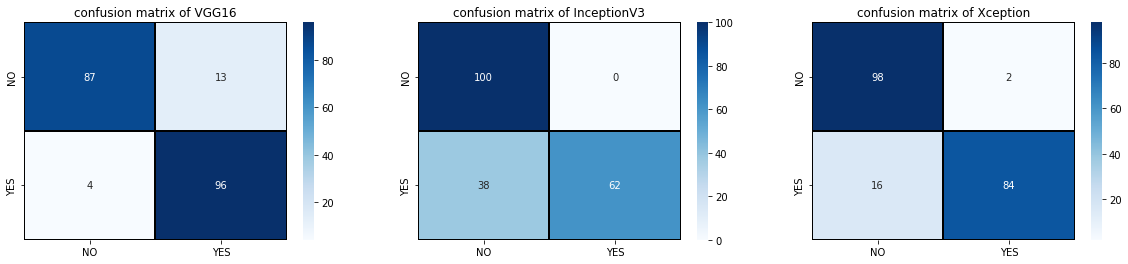

In [ ]:
plt.figure(figsize = (20,4))

plt.subplot(1,3,1)
plt.title('confusion matrix of VGG16')
sns.heatmap(cm1 ,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)

plt.subplot(1,3,2)
plt.title('confusion matrix of InceptionV3')
sns.heatmap(cm2 ,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)

plt.subplot(1,3,3)
plt.title('confusion matrix of Xception')
sns.heatmap(cm3 ,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)